In [133]:
import requests as rq
import datetime as dt
import pandas as pd
import os
import re
import matplotlib as m
from matplotlib import pyplot as plt
from plotnine import *
import numpy as np


In [134]:
# DATA CLEANING FOR LOMBARDY
# open csv
ds_path = os.getcwd() + "/data_source"
data_path_ita = ds_path + f"/ita_{dt.date.today()}.csv"
ita_raw = pd.read_csv(data_path_ita)

In [135]:
# select relvant data
print(ita_raw.columns)

ita_selected = ita_raw[ita_raw[ 'denominazione_regione' ] =='Lombardia'] [[
                                                                'data',
                                                                'denominazione_regione', 
                                                                'totale_casi',
                                                                'nuovi_positivi'
                                                                    ]] 
print(ita_selected.dtypes)
print(ita_selected)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note'],
      dtype='object')
data                     object
denominazione_regione    object
totale_casi               int64
nuovi_positivi            int64
dtype: object
                     data denominazione_regione  totale_casi  nuovi_positivi
8     2020-02-24T18:00:00             Lombardia          172             166
29    2020-02-25T18:00:00             Lombardia          240              68
50    2020-02-26T18:00:00             Lombardia          258              18
71    2020-02-27T18:00:00             Lombardia          403             145
92    2020-02-28T18:00:00          

In [136]:
# turning time stamp inot pandas data format

ita_selected[['date']] =[ pd.to_datetime(i.split("T")[0], format = "%Y-%m-%d" ) for i in ita_selected['data'] ]

In [137]:
ita_selected.drop(['data'], axis=1)
ita_selected.head(5)

,data,denominazione_regione,totale_casi,nuovi_positivi,date
8,2020-02-24T18:00:00,Lombardia,172,166,2020-02-24
29,2020-02-25T18:00:00,Lombardia,240,68,2020-02-25
50,2020-02-26T18:00:00,Lombardia,258,18,2020-02-26
71,2020-02-27T18:00:00,Lombardia,403,145,2020-02-27
92,2020-02-28T18:00:00,Lombardia,531,128,2020-02-28


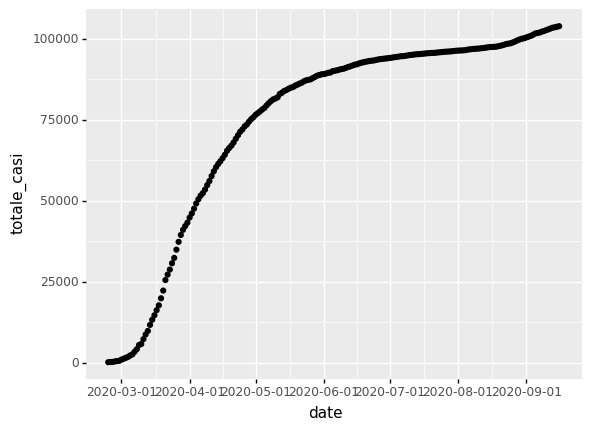

<ggplot: (8761608060633)>


In [138]:
print(ggplot(ita_selected)+aes(x='date', y='totale_casi')+geom_point())

In [139]:
# DATA CLEANING FOR SWITZERLAND
# load data
ds_path = os.getcwd() + "/data_source"
data_path_ch = ds_path + f"/ch_{dt.date.today()}.csv"
ch_raw = pd.read_csv(data_path_ch)

In [140]:
#select data

print(ch_raw.columns)

#ch_cumul=ch_raw[ ['date', 'ncumul_conf']# selected layer
ch_cumul=pd.DataFrame({
    
    'date' : ch_raw['date'], 
    'cum_cases' : ch_raw['ncumul_conf'], 
    'new_cases': ch_raw['ncumul_conf']-ch_raw['ncumul_conf'].shift(-1) 
    
    })

print(ch_cumul.iloc[0,0])

# turn date as date object

new_dates=[ pd.to_datetime(i, format = "%Y-%m-%d" ) for  i in ch_cumul['date']]
ch_cumul[['date']]=list(new_dates)

ch_cumul.head(5)

Index(['date', 'time', 'abbreviation_canton_and_fl', 'ncumul_tested',
       'ncumul_conf', 'new_hosp', 'current_hosp', 'current_icu',
       'current_vent', 'ncumul_released', 'ncumul_deceased', 'source',
       'current_isolated', 'current_quarantined'],
      dtype='object')
2020-02-27


,date,cum_cases,new_cases
0,2020-02-27,NaN,NaN
1,2020-03-01,0.0,0.0
2,2020-03-02,0.0,-1.0
3,2020-03-03,1.0,0.0
4,2020-03-04,1.0,0.0


/home/matt/anaconda3/envs/propulsion/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


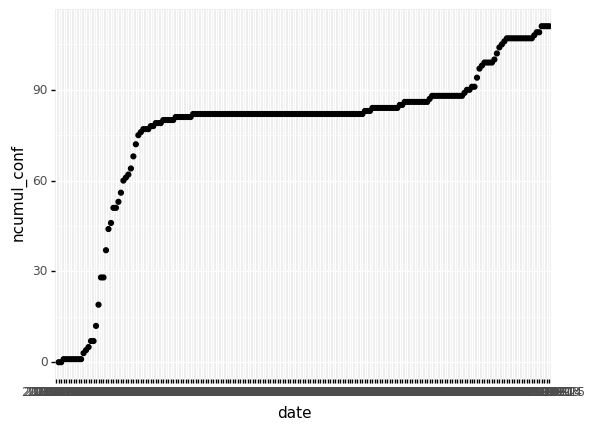

<ggplot: (8761608099985)>


In [141]:
# plotting
print(ggplot(ch_raw)+aes(x='date', y='ncumul_conf')+geom_point())

In [142]:
# merging together layers form ch and lombardy

data_combined = ita_selected.merge(ch_cumul, on = 'date' )
data_combined.head(5)

,data,denominazione_regione,totale_casi,nuovi_positivi,date,cum_cases,new_cases
0,2020-02-27T18:00:00,Lombardia,403,145,2020-02-27,NaN,NaN
1,2020-03-01T17:00:00,Lombardia,984,369,2020-03-01,0.0,0.0
2,2020-03-02T18:00:00,Lombardia,1254,270,2020-03-02,0.0,-1.0
3,2020-03-03T18:00:00,Lombardia,1520,266,2020-03-03,1.0,0.0
4,2020-03-04T17:00:00,Lombardia,1820,300,2020-03-04,1.0,0.0


/home/matt/anaconda3/envs/propulsion/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:532: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


[nan,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.0,
 -1.0,
 -1.0,
 -2.0,
 0.0,
 -5.0,
 -7.0,
 -9.0,
 0.0,
 -9.0,
 -7.0,
 -2.0,
 -5.0,
 0.0,
 -2.0,
 -3.0,
 -4.0,
 -1.0,
 -1.0,
 -2.0,
 -4.0,
 -4.0,
 -3.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


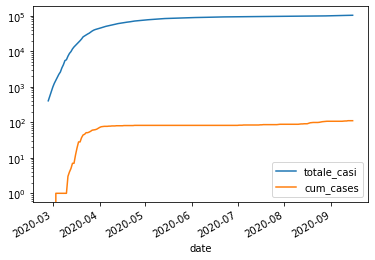

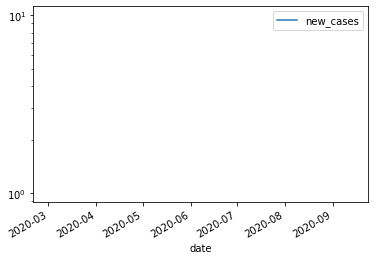

In [152]:
data_combined.plot(x = 'date', y = ['totale_casi', 'cum_cases'], logy=True)

data_combined.plot(x = 'date', y = 'new_cases', logy=True)
